In [1]:
# ==========================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------
#        Enrique Alejnadro Laurel Cossio, Septiembre 2024
# ==========================================================
#        PRACTICA -Regresión Lineal Simple y Múltiple
# ==========================================================

In [2]:
# Cargamos Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm # modelo de regresion lineal
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split # train test

In [3]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS/main/data/insurance.csv'
seguros = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(seguros.shape) #
seguros.head(2)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


Detalle de las variables
- age: Edad
- sex: sexo
- bmi: indices de masa corporal(para evaluar el riesgo de salud del asegurado)
- children: número de hijos
- smoker: fumador
- region: area donde habita
- chargues: costo del seguro



# 1. Exploración de datos

In [5]:
# una copia de la fuente de datos
df = seguros.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


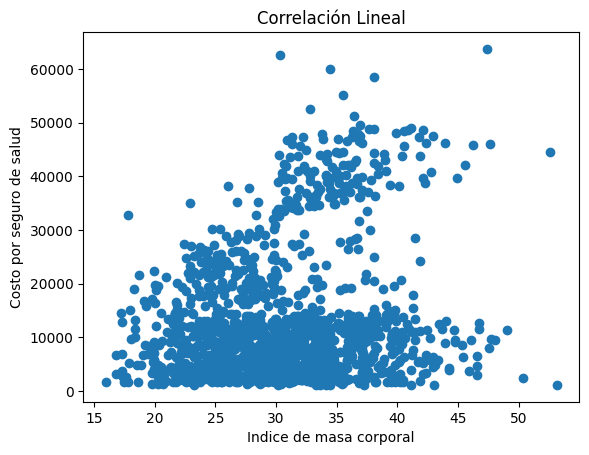

In [8]:
# grafico de dispersión
plt.scatter(df.bmi, df.charges)
plt.title('Correlación Lineal')
plt.xlabel('Indice de masa corporal')
plt.ylabel('Costo por seguro de salud')
plt.grid(False)

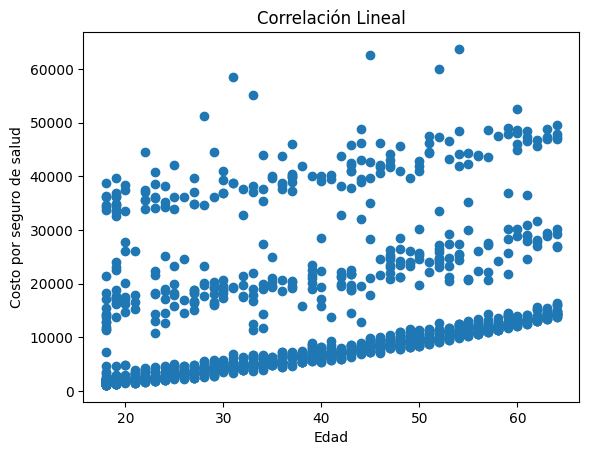

In [9]:
# grafico de dispersión
plt.scatter(df.age, df.charges)
plt.title('Correlación Lineal')
plt.xlabel('Edad')
plt.ylabel('Costo por seguro de salud')
plt.grid(False)

# 2. Modelo de Regresión

In [10]:
# a dummies las variables categoricas
df = pd.get_dummies(df, columns=['region'], drop_first=True)
print(df.shape)
df.head(2)

(1338, 9)


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,16884.9240,False,False,True
1,18,male,33.77,1,no,1725.5523,False,True,False


In [11]:
# a dummies
df = pd.get_dummies(df, columns=['sex','smoker'], drop_first=True)
print(df.shape)
df.head(2)

(1338, 9)


,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.90,0,16884.9240,False,False,True,False,True
1,18,33.77,1,1725.5523,False,True,False,True,False


In [12]:
# variables dummies  a entero
df = df.replace({True: 1, False: 0})

In [ ]:
# Definir las variables independientes y dependientes
X = # complete las variables independientes definidas
y = df['charges'] # variables dependiente

# Añadir una constante a las variables independientes
X = sm.add_constant(X) # relacionado intercepto

In [ ]:
X.head()

,const,age,sex_male,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,0,27.900,0,1,0,0,1
1,1.0,18,1,33.770,1,0,0,1,0
2,1.0,28,1,33.000,3,0,0,1,0
3,1.0,33,1,22.705,0,0,1,0,0
4,1.0,32,1,28.880,0,0,1,0,0


In [ ]:
# División de conjunto de datos en entrenamiento y testeo
# train - test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 'tamaño del test', random_state = 'semilla aleatoria') #Separamos 30% para test

In [ ]:
print(x_train.shape) # el modelo entrena
print(x_test.shape) # evaluamos al modelo

(936, 9)
(402, 9)


In [ ]:
# Ajustar el modelo de regresión lineal
modelo_OLS = sm.OLS(y_train, x_train).fit()

# Resumen del modelo
print(modelo_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     334.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          3.10e-267
Time:                        10:30:10   Log-Likelihood:                -9471.2
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     927   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.158e+04   1189.204  

In [ ]:
# para ver la significancia de las variables independientes, se vera el p_valor
# a un valor de significacia alfa=0.05
# H0: B_i=0 # la variable X_i no aporta a la explicabilidad de Y
# H1: B_i!=0

# si p_valor<=alfa entonces se rechaza la hipotesis nula(H0)

In [ ]:
df_train = pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis = 1)
print(df_train.shape)
df_train.head(2)

(936, 10)


,const,age,sex_male,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,charges
355,1.0,46,1,27.600,0,0,0,0,1,24603.04837
477,1.0,25,1,35.625,0,0,1,0,0,2534.39375


In [ ]:
# Ajustando el modelo de regresion utilizando una formula:
resultados = smf.ols("charges ~ 'defina las variables independientes'", data=df_train).fit()

# Resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     334.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          3.10e-267
Time:                        10:30:16   Log-Likelihood:                -9471.2
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     927   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.158e+04   1189.204  